# Linear Regression Implementation - Boston House Price

Linkedin: https://www.linkedin.com/in/satya-nerurkar-9b0655190/ <br>
Github: https://github.com/SatyaNerurkar

In [1]:
import pandas as pd # data processing, CSV file I/O
import numpy as np  # linear algebra

# Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
sns.set(rc={'figure.figsize':(15,10)})

import warnings
warnings.filterwarnings('ignore')

# Display enitre dataset in output cell.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

%matplotlib inline

### Data Ingestion 

In [2]:
# Import dataset from sklearn
from sklearn.datasets import load_boston

# Load dataset
boston=load_boston()

In [3]:
# Dataset file contents
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
# Dataset description
boston['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [5]:
# Columns from dataset 
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
# actual data from dataset 
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
# target (dependent) data from dataset 
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### Preparing the dataframe 

In [8]:
dataset = pd.DataFrame(boston['data'], columns=boston['feature_names'])

In [9]:
dataset['Price'] = boston['target']

###### Profile of the data 

In [10]:
print('This dataset contains {} rows and {} columns.'.format(dataset.shape[0], dataset.shape[1]))

This dataset contains 506 rows and 14 columns.


In [11]:
dataset.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [13]:
dataset.describe().T # Displaying basic statistical information on data.

count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
Price    506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  
CRIM       3.677083   88.9762  
ZN        12.500000  100.0000  
INDUS     18.100000   27.7400  
CHAS       0.000000    1.0000  
NOX        0.624000    0.8710  
RM         6.623500    8.7800  
AGE       94.075000  100.0000  
DIS        5.188425   12.1265  
RAD       24.000000   24.0000  
TAX      666.000000  711.0000  
PTRATIO   20.200000   22.0000  
B        396.225000  396.9000  
LSTAT     16.955000   37.9700  
Price     25.000000   50.0000

In [14]:
dataset.isnull().sum() # There are no missing values in this dataset.

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

### EDA 

In [15]:
dataset.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
Price   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     Price  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
Price    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

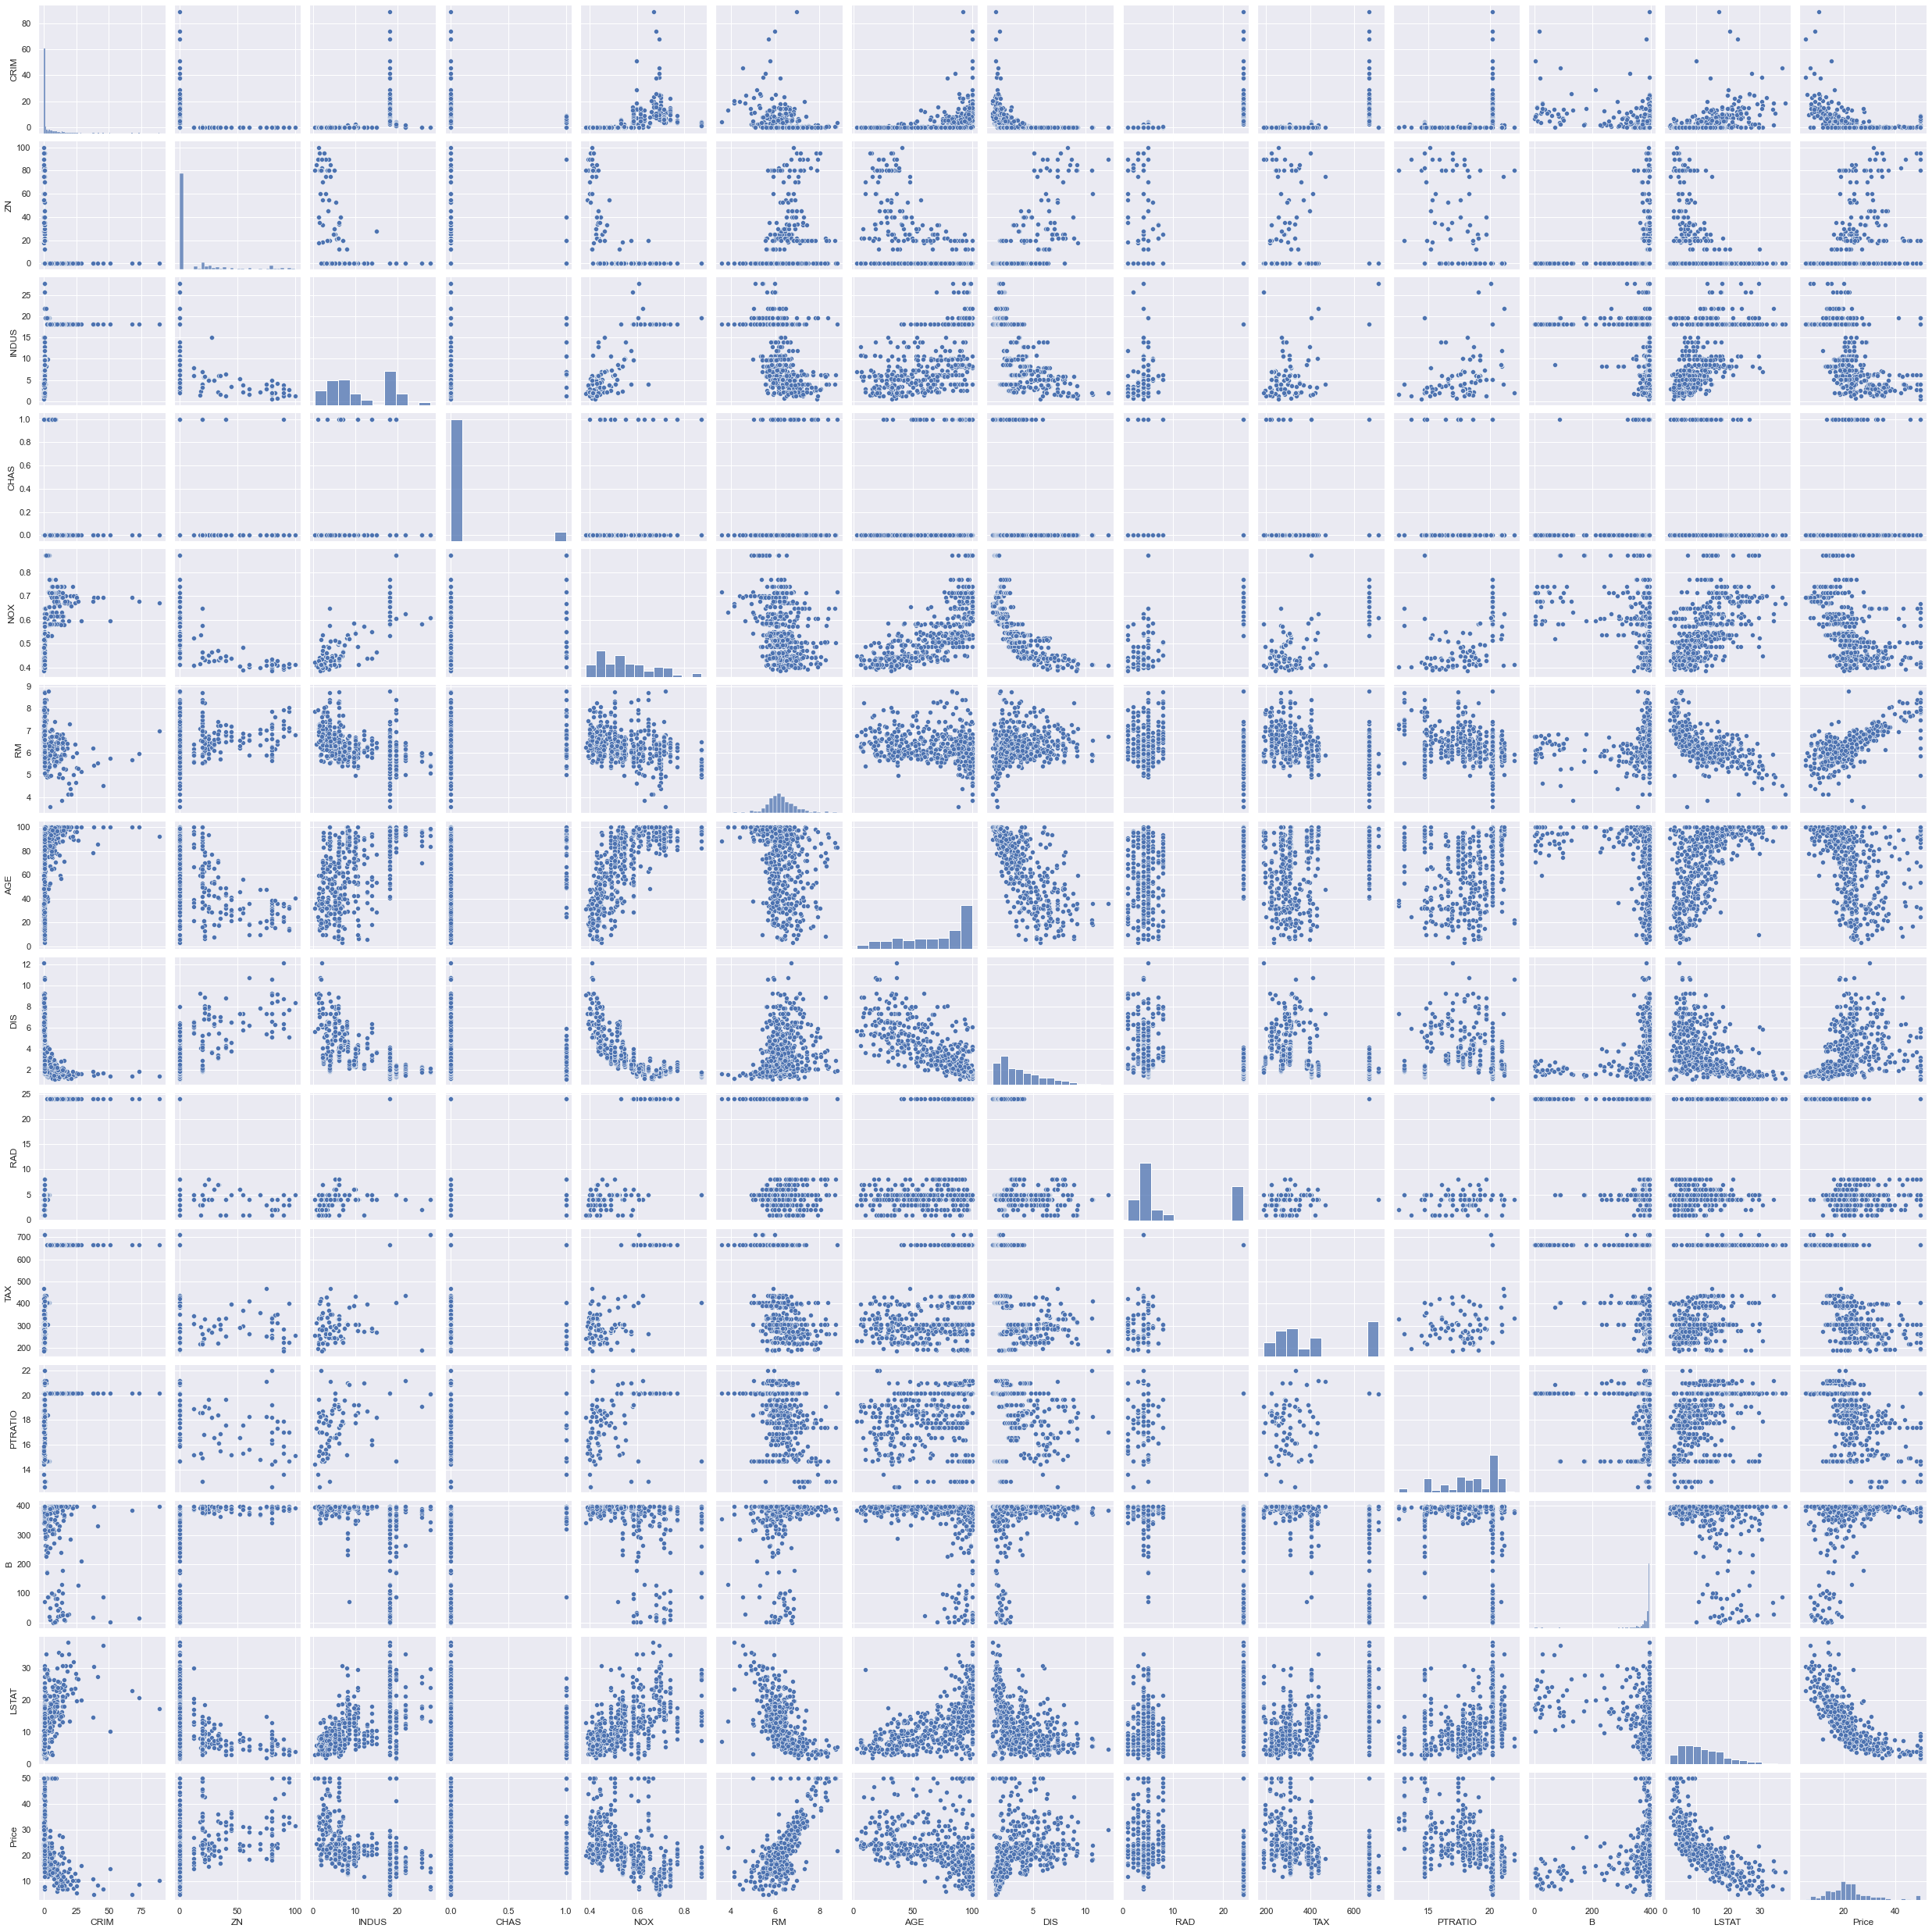

In [16]:
sns.pairplot(dataset)

In [17]:
fig = px.imshow(dataset.corr(), text_auto=True, width=800, height=800)
fig.show()

Text(0, 0.5, 'Price')

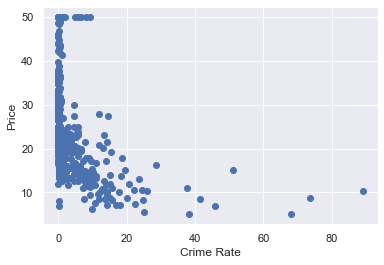

In [18]:
plt.scatter(dataset['CRIM'], dataset['Price'])
plt.xlabel('Crime Rate')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

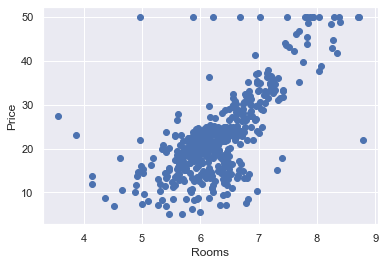

In [19]:
plt.scatter(dataset['RM'], dataset['Price'])
plt.xlabel('Rooms')
plt.ylabel('Price')

<AxesSubplot:xlabel='RM', ylabel='Price'>

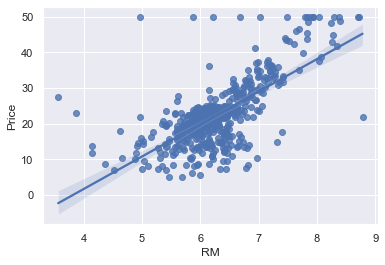

In [20]:
sns.regplot(x = 'RM', y='Price', data=dataset)

<AxesSubplot:xlabel='CRIM', ylabel='Price'>

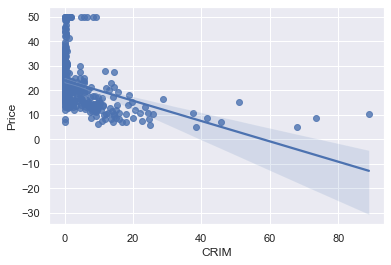

In [21]:
sns.regplot(x = 'CRIM', y='Price', data=dataset)

### Feature Engineering 

##### Independent and Dependent features

In [22]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [23]:
x.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [24]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

##### Splitting into train and test dataset 

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)

In [26]:
X_train.head()

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
147   2.36862   0.0  19.58   0.0  0.871  4.926   95.7  1.4608   5.0  403.0   
330   0.04544   0.0   3.24   0.0  0.460  6.144   32.2  5.8736   4.0  430.0   
388  14.33370   0.0  18.10   0.0  0.700  4.880  100.0  1.5895  24.0  666.0   
238   0.08244  30.0   4.93   0.0  0.428  6.481   18.5  6.1899   6.0  300.0   
113   0.22212   0.0  10.01   0.0  0.547  6.092   95.4  2.5480   6.0  432.0   

     PTRATIO       B  LSTAT  
147     14.7  391.71  29.53  
330     16.9  368.57   9.09  
388     20.2  372.92  30.62  
238     16.6  379.41   6.36  
113     17.8  396.90  17.09

In [27]:
y_train.head()

147    14.6
330    19.8
388    10.2
238    23.7
113    18.7
Name: Price, dtype: float64

In [28]:
X_test.head()

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
305  0.05479  33.0   2.18   0.0  0.472  6.616   58.1  3.3700  7.0  222.0   
193  0.02187  60.0   2.93   0.0  0.401  6.800    9.9  6.2196  1.0  265.0   
65   0.03584  80.0   3.37   0.0  0.398  6.290   17.8  6.6115  4.0  337.0   
349  0.02899  40.0   1.25   0.0  0.429  6.939   34.5  8.7921  1.0  335.0   
151  1.49632   0.0  19.58   0.0  0.871  5.404  100.0  1.5916  5.0  403.0   

     PTRATIO       B  LSTAT  
305     18.4  393.36   8.93  
193     15.6  393.37   5.03  
65      16.1  396.90   4.67  
349     19.7  389.85   5.89  
151     14.7  341.60  13.28

In [29]:
y_test.head()

305    28.4
193    31.1
65     23.5
349    26.6
151    19.6
Name: Price, dtype: float64

##### Standardize the dataset 

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
X_train = scaler.fit_transform(X_train)

In [33]:
X_test = scaler.transform(X_test)

In [35]:
X_train

array([[-0.13641471, -0.47928013,  1.16787606, ..., -1.77731527,
         0.39261401,  2.36597873],
       [-0.41777807, -0.47928013, -1.18043314, ..., -0.75987458,
         0.14721899, -0.54115799],
       [ 1.31269177, -0.47928013,  0.95517731, ...,  0.76628645,
         0.19334986,  2.52100705],
       ...,
       [-0.13520965, -0.47928013,  0.95517731, ...,  0.76628645,
         0.17012536,  0.06331026],
       [-0.40281114, -0.47928013,  2.04022838, ...,  0.25756611,
         0.32166792,  0.27238516],
       [-0.33104058,  0.34161649, -1.07552092, ..., -2.56351944,
         0.39993132, -0.34772815]])

In [36]:
X_test

array([[-0.41664568,  0.87519929, -1.33277144, ..., -0.06616502,
         0.41011193, -0.56391444],
       [-0.42063267,  1.98340973, -1.22498491, ..., -1.36108953,
         0.41021798, -1.11860295],
       [-0.41894074,  2.80430634, -1.16175014, ..., -1.12985301,
         0.44765291, -1.16980497],
       ...,
       [-0.40804678,  1.36773726, -1.15169007, ..., -1.54607875,
         0.29854946, -1.18545003],
       [-0.41098494, -0.47928013,  0.19779729, ...,  0.07257689,
         0.20119741, -0.13154186],
       [-0.37856708, -0.47928013, -0.22328875, ..., -0.06616502,
         0.43482111, -0.5141347 ]])

### Model training 

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
regression = LinearRegression()

regression.fit(X_train, y_train)

LinearRegression()

##### Coefficient and intercept

In [39]:
print(regression.coef_)
print(regression.intercept_)

[-1.29099218  1.60949999 -0.14031574  0.37201867 -1.76205329  2.22752218
  0.32268871 -3.31184248  2.70288107 -2.09005699 -1.7609799   1.25191514
 -3.83392028]
22.077286135693214


###### Prediction 

In [40]:
reg_pred = regression.predict(X_test)

In [41]:
reg_pred

array([31.43849583, 31.98794389, 30.99895559, 22.31396689, 18.89492791,
       16.21371128, 35.9881236 , 14.81264582, 25.04500847, 37.12806894,
       21.49110158, 30.88757187, 28.05752881, 34.05600093, 33.75791114,
       40.63880011, 24.24023412, 23.41351375, 25.54158122, 21.34135664,
       32.71699711, 17.88341061, 25.49549436, 25.01006418, 32.54102925,
       20.48979076, 19.48816948, 16.92733183, 38.38530857,  0.36265208,
       32.42715816, 32.15306983, 26.10323665, 23.79611814, 20.67497128,
       19.69393973,  3.50784614, 35.26259797, 27.04725425, 27.66164435,
       34.35132103, 29.83057837, 18.40939436, 31.56953795, 17.91877807,
       28.50042742, 19.49382421, 21.69553078, 38.0954563 , 16.44490081,
       24.58507284, 19.67889486, 24.53954813, 34.30610423, 26.74699088,
       34.87803562, 21.06219662, 19.87980936, 18.68725139, 24.71786624,
       19.96344041, 23.56002479, 39.57630226, 42.81994338, 30.37060855,
       17.03737245, 23.83719412,  3.2425022 , 31.5046382 , 28.63

<AxesSubplot:xlabel='Price', ylabel='Density'>

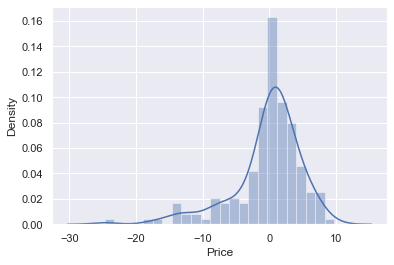

In [42]:
sns.distplot(reg_pred-y_test)

##### Assumptions Of Linear Regression 

Text(0, 0.5, 'Test Prediction data')

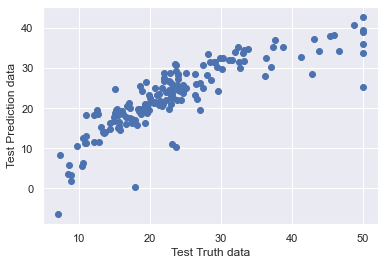

In [43]:
plt.scatter(y_test, reg_pred)
plt.xlabel('Test Truth data')
plt.ylabel('Test Prediction data')

###### Residuals 

In [44]:
residual=y_test-reg_pred

In [45]:
residual

305    -3.038496
193    -0.887944
65     -7.498956
349     4.286033
151     0.705072
433    -1.913711
161    14.011876
129    -0.512646
269    -4.345008
226     0.471931
107    -1.091102
222    -3.387572
181     8.142471
275    -2.056001
277    -0.657911
262     8.161200
325     0.359766
184     2.986486
176    -2.341581
154    -4.341357
157     8.583003
446    -2.983411
114    -6.995494
324    -0.010064
192     3.858971
336    -0.989791
7       7.611831
458    -2.027332
282     7.614691
412    17.537348
197    -2.127158
227    -0.553070
347    -3.003237
43      0.903882
476    -3.974971
497    -1.393940
438     4.892154
291     2.037402
311    -4.947254
91     -5.661644
228    12.348679
223     0.269422
402    -6.309394
194    -2.469538
47     -1.318778
343    -4.600427
361     0.406176
479    -0.295531
280     7.304544
24     -0.844901
164    -1.885073
396    -7.178895
230    -0.239548
98      9.493896
504    -4.746991
260    -1.078036
119    -1.762197
359     2.720191
310    -2.5872

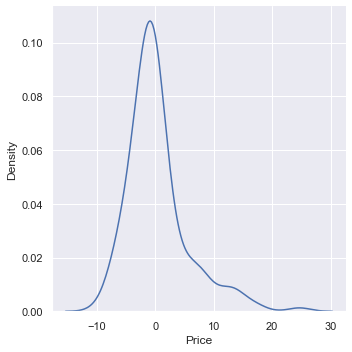

In [46]:
sns.displot(residual,kind='kde')

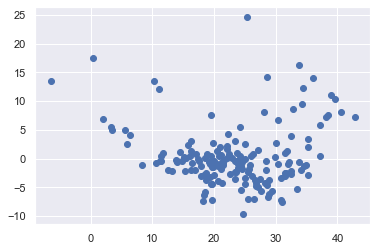

In [47]:
plt.scatter(reg_pred,residual)

### Performance metrics 

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

27.100991709962493
3.520658529879791
5.205861284164465


##### $\textrm{R}^2$

In [49]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.7165219393967555


##### Adjusted $\textrm{R}^2$

In [50]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6924355682343882

### Ridge Regression Algorithm 

In [51]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge_regressor=Ridge()

In [52]:
ridge_regressor

Ridge()

In [53]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

Best parameters

In [54]:
print(ridgecv.best_params_)

{'alpha': 5}


Best mean scored error

In [55]:
print(ridgecv.best_score_)

-23.049531955884152


In [56]:
ridge_pred=ridgecv.predict(X_test)

In [57]:
ridge_pred

array([30.94893945, 31.95230552, 30.83799576, 22.92515291, 19.06064421,
       16.23530635, 35.88249364, 14.95641351, 24.87647045, 36.93516109,
       21.49803619, 30.77541167, 27.74128325, 33.71782021, 33.61550173,
       40.5256606 , 24.39052554, 23.08079973, 25.4775641 , 21.72623058,
       32.56414106, 17.89589523, 25.5072399 , 25.04583898, 32.731564  ,
       20.48310157, 19.62667757, 16.99278046, 38.2589971 ,  0.26121174,
       32.49320583, 31.92195512, 26.2493227 , 23.88495547, 20.53407925,
       19.79600079,  3.77053503, 34.85557017, 26.91615746, 27.5962946 ,
       34.29501115, 29.56336019, 18.35920959, 31.48627405, 17.96762164,
       28.54935954, 19.5050633 , 21.50771653, 37.82319439, 16.59555187,
       24.48011234, 19.59543258, 24.32161035, 34.41441111, 26.73254221,
       34.68317698, 21.15136538, 19.89830841, 18.5570366 , 24.69580624,
       20.12960233, 23.65864042, 39.69027457, 42.68897335, 30.2869122 ,
       17.19710701, 23.87053511,  3.20992972, 31.14003141, 29.15

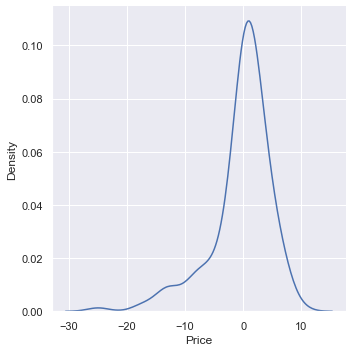

In [58]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

##### Assumptions of linear Regression 

Text(0, 0.5, 'Test predicted data')

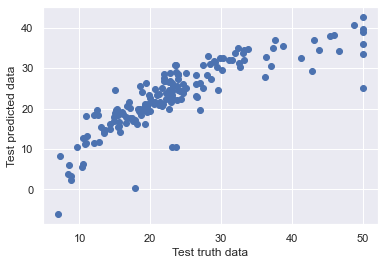

In [59]:
plt.scatter(y_test,ridge_pred)
plt.xlabel("Test truth data")
plt.ylabel('Test predicted data')

###### Residual

In [60]:
residual=y_test-ridge_pred

In [61]:
residual

305    -2.548939
193    -0.852306
65     -7.337996
349     3.674847
151     0.539356
433    -1.935306
161    14.117506
129    -0.656414
269    -4.176470
226     0.664839
107    -1.098036
222    -3.275412
181     8.458717
275    -1.717820
277    -0.515502
262     8.274339
325     0.209474
184     3.319200
176    -2.277564
154    -4.726231
157     8.735859
446    -2.995895
114    -7.007240
324    -0.045839
192     3.668436
336    -0.983102
7       7.473322
458    -2.092780
282     7.741003
412    17.638788
197    -2.193206
227    -0.321955
347    -3.149323
43      0.815045
476    -3.834079
497    -1.496001
438     4.629465
291     2.444430
311    -4.816157
91     -5.596295
228    12.404989
223     0.536640
402    -6.259210
194    -2.386274
47     -1.367622
343    -4.649360
361     0.394937
479    -0.107717
280     7.576806
24     -0.995552
164    -1.780112
396    -7.095433
230    -0.021610
98      9.385589
504    -4.732542
260    -0.883177
119    -1.851365
359     2.701692
310    -2.4570

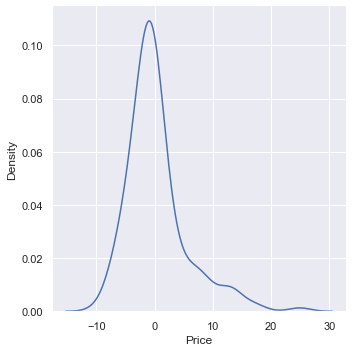

In [62]:
sns.displot(residual,kind='kde')

### Scatter plot with residual and prediction

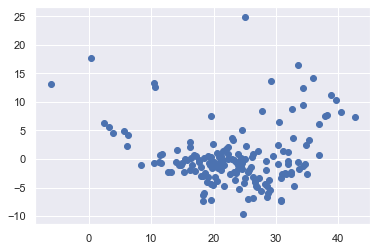

In [63]:
plt.scatter(ridge_pred,residual)

### Performance Metrics 

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

27.017970344577275
3.5019597897900274
5.197881332290809


###### $\textrm{R}^2$ 

In [65]:
from sklearn.metrics import r2_score
ridge_score=r2_score(y_test,ridge_pred)
print(score)

0.7165219393967555


##### Adjusted $\textrm{R}^2$ 

In [66]:
1-(1-ridge_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6933777632412124

# Lasso Regression

In [67]:
from sklearn.linear_model import Lasso

In [68]:
lasso=Lasso()

In [69]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [70]:
print(lassocv.best_score_)

-28.53070382049192


In [71]:
lasso_pred=lassocv.predict(X_test)

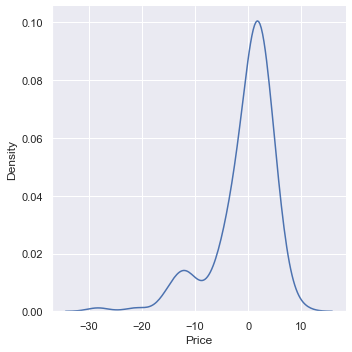

In [72]:
import seaborn as sns
sns.displot(lasso_pred-y_test,kind='kde')

# Elastic-net Regression 

In [73]:
from sklearn.linear_model import ElasticNet

In [74]:
elastic_net_reg=ElasticNet()
elastic_net_reg

ElasticNet()

In [75]:
## Passing independent and dependent training dataset to the model
elastic_net_reg.fit(X_train,y_train)

ElasticNet()

In [76]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
elastic_netcv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
elastic_netcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [77]:
print(elastic_netcv.best_score_)


-28.53070382049192


In [78]:
elastic_net_pred=elastic_netcv.predict(X_test)

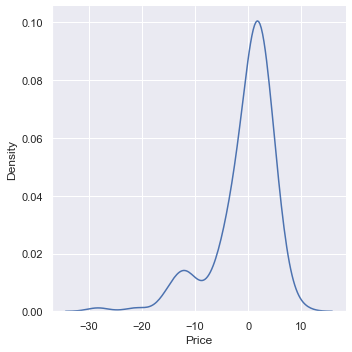

In [79]:
import seaborn as sns
sns.displot(elastic_net_pred-y_test,kind='kde')

###  Assumption of Linear Regression

Text(0, 0.5, 'Test predicted data')

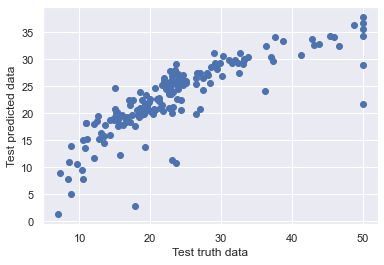

In [80]:
plt.scatter(y_test,elastic_net_pred)
plt.xlabel("Test truth data")
plt.ylabel('Test predicted data')

### Residual 

In [81]:
residual=y_test-elastic_net_pred

In [82]:
residual

305     2.758056
193     1.285747
65     -4.443243
349    -0.952565
151    -1.396403
433    -4.445206
161    15.717820
129    -1.630094
269    -0.008834
226     3.524573
107     0.494976
222     0.895096
181    12.120092
275     2.071339
277     3.879623
262    12.398395
325    -1.651441
184     6.518827
176    -0.767085
154    -5.508693
157    10.425717
446    -3.883010
114    -5.420414
324    -0.689965
192     3.967242
336    -2.093462
7       6.329021
458    -4.271457
282    11.901708
412    15.065786
197    -0.269987
227     2.304347
347    -3.755588
43     -0.553467
476    -2.564778
497    -1.433028
438     0.557104
291     7.527606
311    -3.302075
91     -3.605134
228    14.315374
223     3.207726
402    -5.930075
194    -0.263403
47     -2.311195
343    -3.368136
361    -0.562039
479     0.363778
280    11.008841
24     -2.459736
164    -0.979354
396    -6.138977
230     1.773133
98     11.019173
504    -4.037419
260     3.406455
119    -1.214753
359     1.652037
310    -1.6699

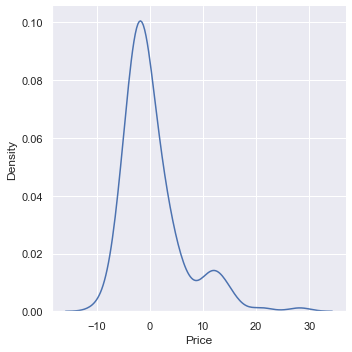

In [83]:
sns.displot(residual,kind='kde')

### Scatter plot with residual and prediction 

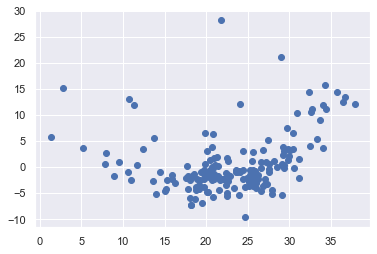

In [84]:
plt.scatter(elastic_net_pred,residual)

### Performance Metrics 

In [85]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,elastic_net_pred))
print(mean_absolute_error(y_test,elastic_net_pred))
print(np.sqrt(mean_squared_error(y_test,elastic_net_pred)))

32.16822537607396
3.9064325476573205
5.67170392175702


### $\textrm{R}^2$

In [86]:
from sklearn.metrics import r2_score
elastic_net_score=r2_score(y_test,elastic_net_pred)
print(score)

0.7165219393967555


### Adjusted $\textrm{R}^2$ 

In [87]:
1-(1-elastic_net_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6349284164732871

# Thank You!